In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [11]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [12]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [14]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
display("duplicated:",df.duplicated().sum())

'duplicated:'

0

In [16]:
X= df.iloc[:,[3,4]].values

In [17]:
X= df.iloc[:,[3,4]].values

In [18]:
from sklearn.cluster import KMeans

wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Ignore the above warnings

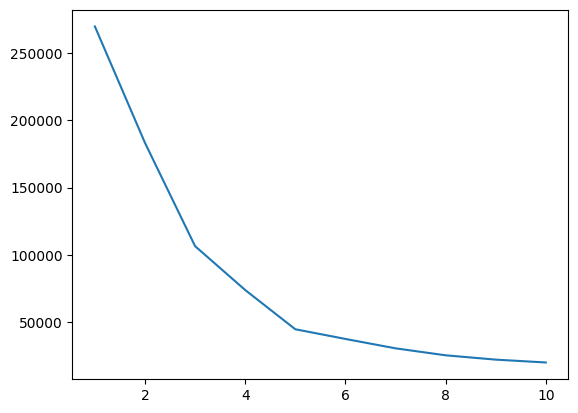

In [19]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)

In [20]:
km = KMeans(n_clusters=5)
y_predict = km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


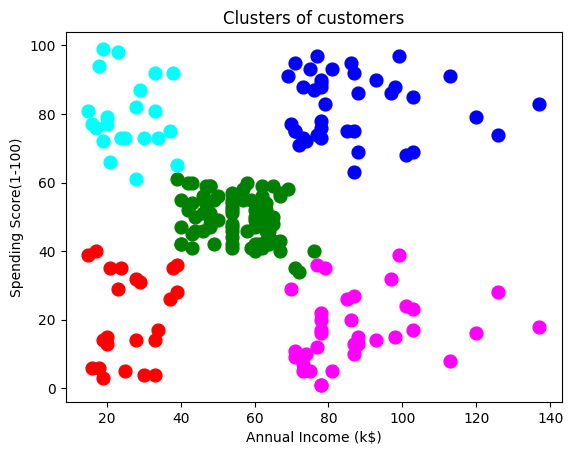

In [21]:
plt.scatter(X[y_predict==0,0],X[y_predict==0,1],s=85,c='red',label='Cluster 1')
plt.scatter(X[y_predict==1,0],X[y_predict==1,1],s=85,c='blue',label='Cluster 2')
plt.scatter(X[y_predict==2,0],X[y_predict==2,1],s=85,c='green',label='Cluster 3')
plt.scatter(X[y_predict==3,0],X[y_predict==3,1],s=85,c='cyan',label='Cluster 4')
plt.scatter(X[y_predict==4,0],X[y_predict==4,1],s=85,c='magenta',label='Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

In [22]:
df["Target"] = y_predict

In [23]:
clustered_df=df
clustered_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


In [24]:
import pandas as pd

x = clustered_df.iloc[:, 1:5]
y = clustered_df.iloc[:, -1]

In [26]:
import pandas as pd
X_df = pd.DataFrame(X)
X_df.head()

,0,1
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [27]:
y.head()

0    0
1    3
2    0
3    3
4    0
Name: Target, dtype: int32

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming 'clustered_df' is your DataFrame
# Make sure you have executed the code that creates 'clustered_df'
X = clustered_df.iloc[:, 1:5]  # Recreate X if it was lost
y = clustered_df.iloc[:, -1]

le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])  # Now X is defined

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [34]:
gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbdt.fit(X_train, y_train)
y_pred=gbdt.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.975

In [35]:
y_pred=gbdt.predict(X_test)
y_pred

array([2, 3, 0, 4, 4, 2, 2, 4, 4, 2, 2, 4, 1, 2, 4, 1, 2, 4, 2, 2, 4, 0,
       4, 2, 2, 2, 2, 2, 1, 2, 3, 0, 2, 2, 4, 2, 1, 1, 4, 2], dtype=int32)

In [36]:
prediction = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
prediction

,Actual,Predicted
95,2,2
15,3,3
30,0,0
158,4,4
128,4,4
115,2,2
69,2,2
170,4,4
174,4,4
45,3,2
